In [2]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
import numpy as np


current_dir = r'C:\Users\user\Documents\Python_project\plot\Data_update_17_11_24.csv' #replace with file where the csv data is stored
df = pd.read_csv(current_dir)

#print(df.head())  # Display the first few rows of the data

data = df[['participant_name','body_part','modality', 'mole_signature_1','mole_signature_2', 'mole_signature_3', 'mole_signature_4','mole_signature_5', 'mole_signature_6','mole_signature_7','mole_signature_8','mole_signature_9','mole_signature_10','mole_signature_11','skin_signature']]

In [3]:
# Define wavelength ranges for each modality
modality_wavelengths = {
    "tivita": [ 500,  505,  510, 515 , 520 , 525 , 530 , 535,  540 , 545 , 550 , 555 ,560 , 565,
              570 , 575 , 580 , 585  ,590 , 595 , 600  ,605 , 610,  615,  620 , 625,  630,  635,
              640 , 645 , 650,  655 , 660 , 665,  670 , 675,  680 , 685,  690,  695,  700 , 705,
              710 , 715 , 720 , 725 , 730  ,735 , 740 , 745,  750,  755 , 760 , 765 , 770 , 775,
              780  ,785 , 790 , 795 , 800 , 805 , 810  ,815 , 820,  825,  830,  835,  840 , 845,
              850 , 855 , 860 , 865 , 870 , 875 , 880 , 885,  890 , 895 , 900,  905,  910,  915,
             920 , 925 , 930,  935,  940 , 945 , 950 , 955,  960,  965,  970,  975 , 980,  985,
              990,  995, 1000],  # 100 evenly spaced values
    "vis3": [460.67, 464.94, 474.51, 482.19, 492.09, 503.62,
             510.27, 521.71, 532.16, 540.99, 548.85, 559.66,
             566.65, 578.49, 583.94, 591.29],  # 16 specific wavelengths
    "rn2": [613.01, 628.34, 649.74, 668.11, 686.21, 702.07,
            721.03, 739.00, 757.07, 772.81, 789.44, 805.06,
            820.89, 836.60, 849.05],  # 15 specific wavelengths
}

In [4]:
from matplotlib.ticker import MultipleLocator
def identify_outliers(group, column):
    """
    Identifies outliers in the given column of the group DataFrame based on the IQR method.
    """
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[column] < lower_bound) | (group[column] > upper_bound)]

# Flattens the data for mole_signatures and skin_signature
rows = []
for _, row in df.iterrows():
    if row["modality"] == "tivita":  # Filter for `tivita` modality
        # Process mole_signatures
        for signature_col in row.index:
            if signature_col.startswith("mole_signature_") and isinstance(row[signature_col], str): #calculates the mean of all mole_signatures
                reflectance_values = [float(v) for v in row[signature_col].split(",")]
                wavelengths = modality_wavelengths["tivita"]
                for wavelength, reflectance in zip(wavelengths, reflectance_values):
                    rows.append({
                        "participant_name": row["participant_name"],
                        "body_part": row["body_part"],
                        "signature_type": "Spectral Signature of Anomalies",  # Mark as Mole Signature
                        "signature_column": signature_col,
                        "wavelength": wavelength,
                        "reflectance": reflectance
                    })
        # Process skin_signature (index 13 or column 14)
        if isinstance(row["skin_signature"], str):
            reflectance_values = [float(v) for v in row["skin_signature"].split(",")]
            wavelengths = modality_wavelengths["tivita"]
            for wavelength, reflectance in zip(wavelengths, reflectance_values):
                rows.append({
                    "participant_name": row["participant_name"],
                    "body_part": row["body_part"],
                    "signature_type": "Spectral Signature of normal Skin",  # Mark as Skin Signature
                    "signature_column": "skin_signature",  # Always this column
                    "wavelength": wavelength,
                    "reflectance": reflectance
                })

# Creates a DataFrame for visualization
plot_df = pd.DataFrame(rows)

# Identify outliers for each combination of wavelength and signature type
outliers = (
    plot_df.groupby(["wavelength", "signature_type"])
    .apply(lambda group: identify_outliers(group, "reflectance"))
    .reset_index(drop=True)
)

C:\Users\user\AppData\Local\Temp\ipykernel_13700\1202659199.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: identify_outliers(group, "reflectance"))


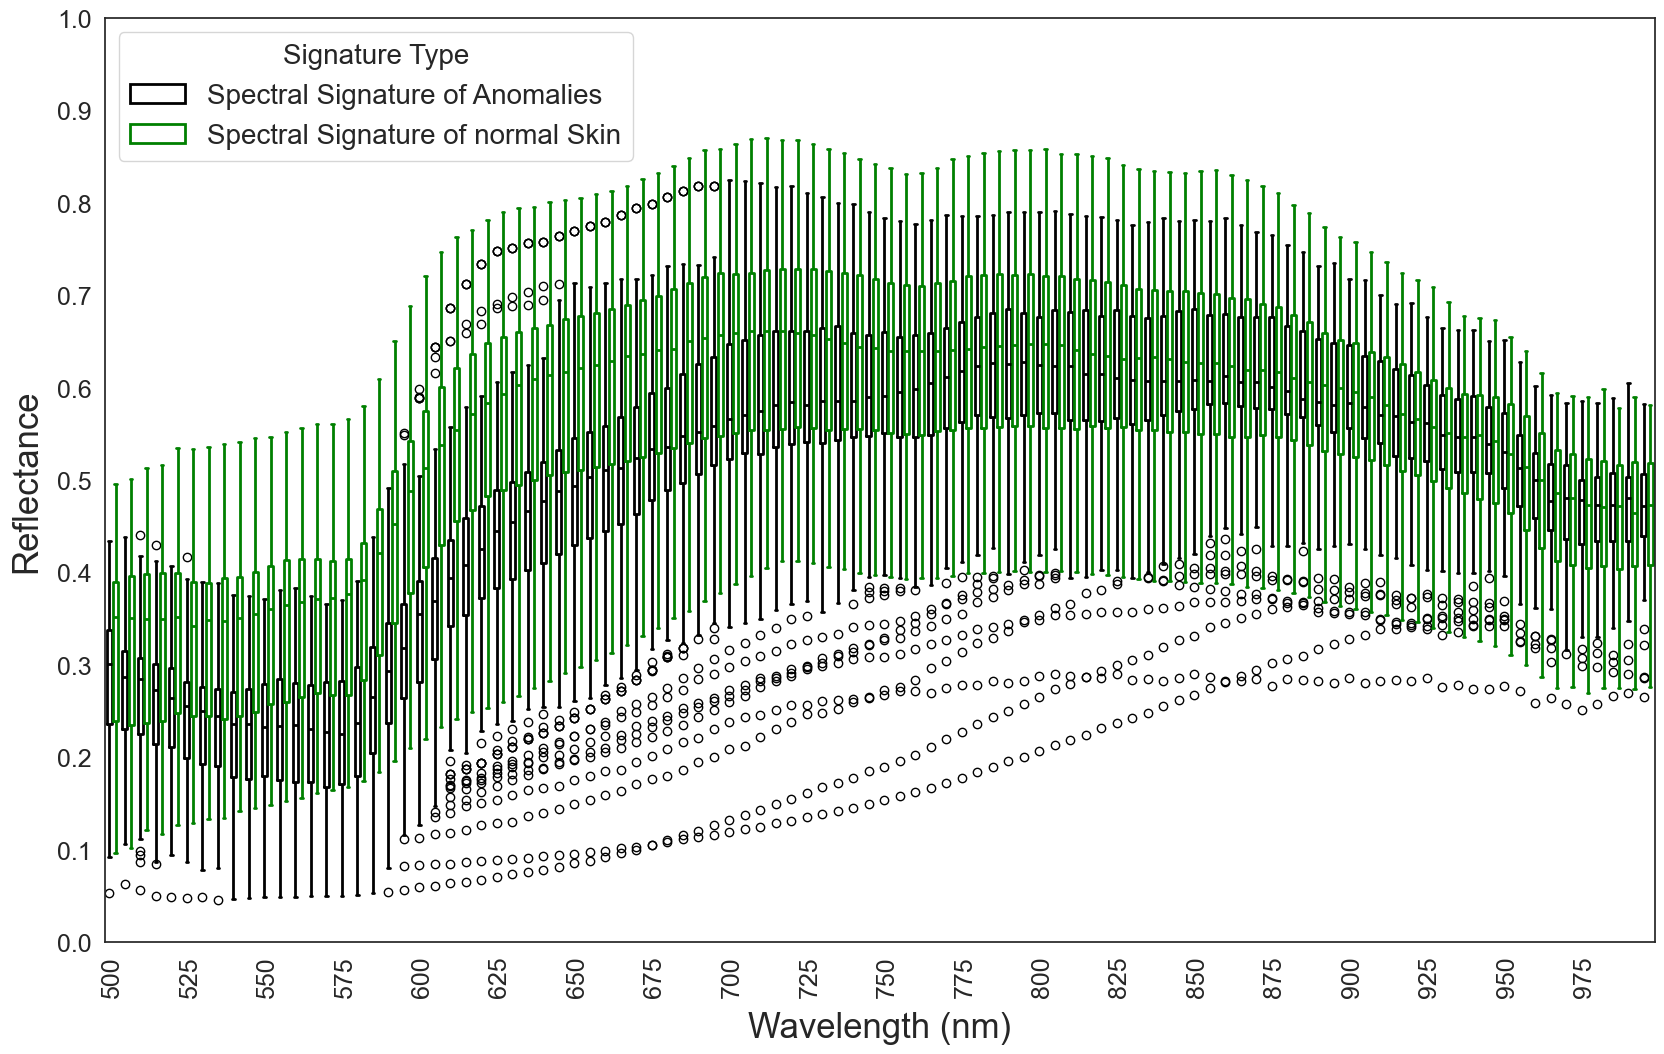

In [5]:
# Plotting boxplot
plt.figure(figsize=(20, 12))
sns.set(style="white")



palette = {"Spectral Signature of Anomalies": "black", "Spectral Signature of normal Skin": "green"}
#palette = {"Spectral Signature of Anomalies": "#1f77b4",  # A distinct blue
           #"Spectral Signature of normal Skin": "#ff7f0e"}  # A distinct orange-red

# Create the boxplot
boxplot = sns.boxplot(
    data=plot_df,
    x="wavelength",
    y="reflectance",
    hue="signature_type",
    palette=palette,
    fill=False,
    gap=.2,
    showfliers=True,
    linewidth=2
)



# Add plot title and labels
#plt.title("Boxplot of Mole and Skin Signatures Tivita (500–1000 nm)", fontsize=16)
plt.xlabel("Wavelength (nm)", fontsize=25, labelpad=10)
plt.ylabel("Reflectance", fontsize=25, labelpad=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=18)


# Customize x-axis to display ticks at every 20 nm
ax = plt.gca()  # Get current axis 
ax.xaxis.set_major_locator(MultipleLocator(5))  # Set major ticks at 20 nm intervals
ax.tick_params(axis='x', rotation=90, labelsize=18)  # Rotate labels and set fontsize
#plt.xticks(np.arange(500, 1001, 25), rotation=90, fontsize=18)

plt.ylim(0, 1) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.legend(
    title="Signature Type", 
    title_fontsize=20, 
    loc="upper left", 
    fontsize=20)
output_path = r'C:\Users\user\OneDrive\Documents\Masterarbeit-doc\These_are_Test_images\Results\tivita_mole_skin_boxplot_combined2.png'
#output_path = r'C:\Users\user\OneDrive\Documents\Masterarbeit-doc\These_are_Test_images\Results\tivita_anomaly.png'
#output_path = r'C:\Users\user\OneDrive\Documents\Masterarbeit-doc\These_are_Test_images\Results\tivita_normal_skin.png'
#plt.savefig(output_path, dpi=400)
plt.savefig(output_path, dpi=600, bbox_inches="tight", format="png")